# Machine Learning 
## Project: Predicting Boston Housing Prices

## Getting Started


The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.



In [42]:
# Importing libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Importing supplementary visualizations code visuals.py
import visuals as vs

%matplotlib inline

# Loading the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration

### Implementation: Calculate Statistics

In [93]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Showing the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**


* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: 

I expect a home that has an'RM' value(number of rooms) of 6 be worth less than a home that has an'RM' value of 7. I think that an increase in the value of 'RM' would lead to an increase in the value of 'MEDV'. It seems intuitive that more rooms would mean more space, higher heating/cooling costs and more expensive home.

Contrarily, more lower class workers and less teachers would mean less desirable, poor neighborhood and cheap home.
In that order, an increase in the both values of 'LSTAT' and 'PTRATIO' would lead to an decrease in the value of 'MEDV'. 

Respectively, I expect a neighborhood that has an 'LSTAT' value(percent of lower class workers) of 15 have home prices be worth more than a neighborhood that has an 'LSTAT' value of 20. Also a neighborhood that has an 'PTRATIO' value(ratio of students to teachers) of 10 have home prices be worth more than a neighborhood that has an 'PTRATIO' value of 15. 

**

----

## Developing a Model

### Implementation: Define a Performance Metric

In [64]:
# TODO: Importing 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculating the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Returning the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |


In [67]:
# Calculating the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:

This model have successfully captured the variation of the target variable. Because R2 score of 0.923 means that 92 percent of the variance in the dependent variable is predictable from the independent variable. This model is good at making predictions.

**

### Implementation: Shuffle and Split Data

In [96]:
# TODO: Importing 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Answer: 
Splitting a dataset into some ratio of training and testing subsets for a learning algorithm gives us a good level of accuracy for our predictions. It prevents from overfitting and underfitting. Overfitting and underfitting will lower accuracy for our learning algorithm. 
When a learning algorithm does not fit to the training data set this will result in underfitting. When a learning algorithm fits too much to the training data set this will result in overfitting.    
**


## Analyzing Model Performance

### Learning Curves


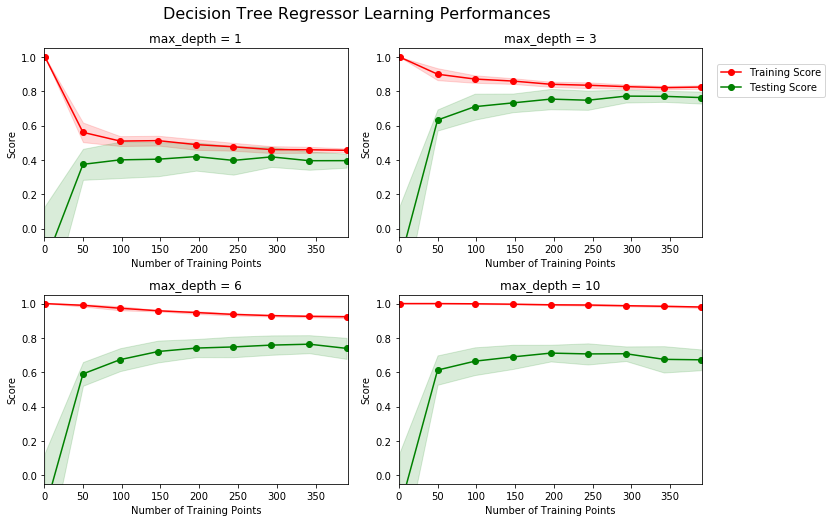

In [92]:
# Producing learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 


**Answer:
It looks that the first graph with the max_depth=1 has the highest level of accuracy. As more training points are added the score of the training curve decreases and the score of the testing curve increases before they reach 100 data points. From 100 data points to 300 data points we can observe small fluctuations in the scores of the training and testing curves.
Having more training points than 300 would not benefit the model because the training and testing curves are converging when they reach 300 data points. 
**

### Complexity Curves

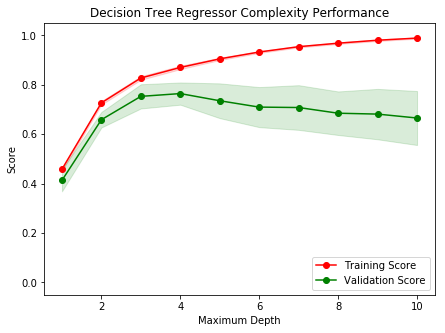

In [83]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Answer:
When the model is trained with a maximum depth of 1, the model suffers from high bias, underfitting, according low validation scores.
When the model is trained with a maximum depth of 10, the model suffers from high variance, overfitting, according high training scores. 
**

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

**Answer: 
The maximum depth of 4 results in a model that best generalizes to unseen data because this depth gives the best, highest validation score of 0.75.
**


## Evaluating Model Performance

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

**Answer:
A Grid Search technique is an approach to evaluate a set of parameter values specified in a grid when performance depends on adjustable parameters.
Models can have many parameters. Finding the best set of parameters will optimize models.
In our example, the parameter "maximum depth" with value of 4 gives the best performance.
**

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Answer:

The cross-validation training technique solves the problem with splitting a data set into training and testing subsets. It is not easy to decide what fraction of data should be in the training subset and what fraction of data should be in the testing subset. The problem is to maximize both of the subsets. We want to maximize a number of data points to get the best performance and validation. But every data point we use for training is lost for testing. The cross validation training technique solves the dilemma by using all the data for training and testing. We split data into same size subsets, folds. A fold is a subset of data points. K is a parameter we set to do the K-fold cv test. 1 fold we use as validation data and (K-1) number of folds we use as training data. We'll try all combination by choosing different folds for training and testing. We'll run K number separate learning experiments.( For example, K = 9. We'll run 9 experiments. In each of 9, we'll pick 1 as our testing set. We'll train our model, and we'll test the performance on the testing set. At the end, we'll have 9 trained and tested models.) Then we'll average the validation scores. The model with the lowest error will be best to perform predictions.



The K-fold cross validation training technique is an approach to evaluate models by randomly partitioning the main data sets into K same size training and testing data subsets.

The Grid Search has many variations in the optimizing a model for different partitions of the data. The K-fold cross validation training technique reduces the variance, so the optimizing a model doesn't depend on the patitioning of the data.
**

### Implementation: Fitting a Model

In [97]:
# TODO: Importing 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Creating cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 2)

    # TODO: Creating a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Creating a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth' : range(1,11)}

    # TODO: Transforming 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Creating the grid search cv object --> GridSearchCV()
    # Including the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fitting the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    #grid search
    print pd.DataFrame(grid.cv_results_)

    # Returning the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  


In [90]:
# Fitting the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Producing the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.001468         0.000478         0.413184          0.458019   
1       0.001184         0.000388         0.658641          0.726948   
2       0.000995         0.000320         0.753116          0.827421   
3       0.001020         0.000323         0.762309          0.870146   
4       0.000988         0.000301         0.733686          0.904881   
5       0.001039         0.000301         0.713943          0.932563   
6       0.001110         0.000303         0.695388          0.954113   
7       0.001220         0.000335         0.698613          0.968265   
8       0.001251         0.000313         0.689981          0.980266   
9       0.001406         0.000347         0.669957          0.988948   

  param_max_depth              params  rank_test_score  split0_test_score  \
0               1   {u'max_depth': 1}               10           0.491221   
1               2   {u'max_depth': 2}                


**Answer: 

My guess was correct. The optimal model has a 'max_depth' parameter with the value of 4.

**

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 


In [98]:
# Producing a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Showing predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer:


Statistics for Boston housing dataset:
Minimum price: \$105,000.00
Maximum price: \$1,024,800.00
Mean price: \$454,342.94
Median price \$438,900.00
Standard deviation of prices: \$165,171.13


I would recommend each client sell his/her home at the predicted selling prices accourding our predictions made by optimized model:

Predicted selling price for Client 1's home: \$403,025.00
Predicted selling price for Client 2's home: \$237,478.72
Predicted selling price for Client 3's home: \$931,636.36

These prices seem very reasonable given the values for the respective features and considering the statistics above for Boston housing dataset. 

Predicted selling price for Client 3's home \$931,636.36 is near Maximum price \$1,024,800.00. Because
Client 3 is selling home with the best following features:
the highest number of rooms - 8, 
the lowest percentage of homeowners in the poor neighborhood - 3%,
the the lowest ratio of students to teachers - 12.

Predicted selling price for Client 2's home \$237,478.72 is near Minimum price: \$105,000.00. Because
Client 2 is selling home with the worst following features:
the lowest number of rooms - 4, 
the highest percentage of homeowners in the poor neighborhood - 32%,
the the highest ratio of students to teachers - 22.

Predicted selling price for Client 1's home \$403,025.00 is near Mean price: \$454,342.94. Because
Client 1 is selling home with the average following features:
the average number of rooms - 5, 
the average percentage of homeowners in the poor neighborhood - 17%,
the the average ratio of students to teachers - 15.

**

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

In [87]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer:

"\$1000000 in 1978 has the same purchasing power as \$3,965,043.56 in 2017. 
The total inflation rate from 1978 to 2017 is 296.50436%. The average inflation rate from 1978 to 2017 is 3.59521%."

Inflation makes the data collected from 1978 not very relevant. However, it helps to observe some common features and to find general tendencies.

The features present in the data are not sufficient to describe a home. I think, factors like presence of garage, garden, gym, basement, balcony, fireplace or not, Age of home, Number of Levels etc should factor in.

The good performace of our model proves that it robust enough to make consistent predictions.

The data collected in a urban city like Boston can not be applicable in a rural city because of the difference in features like public transport, level of noise in the area, distance to the city center or to the nearest airport, population density, air polution level.

It is fair to judge the price of an individual home based on the characteristics of the entire neighborhood. For example, a high level of crime in the poor neighborhoods decreases any home value in the area.
**